In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

## 1. Problem Statement :

        To Predict the Price of mumbai house Dataset of KNN Models

In [6]:
df=pd.read_csv('Mumbai_House_dataset.csv')
df


,title,price,area,price_per_sqft,locality,city,property_type,bedroom_num,bathroom_num,balcony_num,furnished,age,total_floors,latitude,longitude
0,Octave Parijas Horizon,6600283,757,8719.000000,Kalyan,Mumbai,Apartment,2,2,0,Unfurnished,0,1,19.244410,73.123253
1,Shakti Siyara Heights,6169841,652,9462.946319,Kalyan,Mumbai,Apartment,2,2,0,Unfurnished,0,1,19.257294,73.148872
2,Bhagwati Bhagwati Celeste,4599936,396,11616.000000,Dombivali,Mumbai,Apartment,1,1,0,Unfurnished,0,1,19.209026,73.081276
3,Relcon Ridhi Sidhi Sadan Of Ridhi Sidhi Co Ope...,51980000,1130,46000.000000,Ville Parle,Mumbai,Apartment,3,3,0,Unfurnished,0,1,19.097841,72.851158
4,J P Ruchita Bliss,3915000,435,9000.000000,Nala Sopara,Mumbai,Apartment,1,1,0,Unfurnished,0,1,19.420601,72.809319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,,74000000,1600,46250.000000,Vile Parle,Mumbai,Apartment,4,4,0,Unfurnished,6,1,19.107908,72.836632
1995,Reputed Builder Sai Deep Society,9000000,600,15000.000000,Chembur,Mumbai,Apartment,1,1,0,Furnished,0,1,19.048351,72.887627
1996,,2980000,750,3973.333333,Badlapur,Mumbai,Apartment,1,2,0,Unfurnished,0,1,19.177496,73.232552
1997,Shree Tirupati Siddeshwar Gardens,12200000,950,12842.105260,Thane,Mumbai,Apartment,2,2,0,SemiFurnished,6,1,19.231535,72.978653


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1999 non-null   object 
 1   price           1999 non-null   int64  
 2   area            1999 non-null   int64  
 3   price_per_sqft  1999 non-null   float64
 4   locality        1999 non-null   object 
 5   city            1999 non-null   object 
 6   property_type   1999 non-null   object 
 7   bedroom_num     1999 non-null   int64  
 8   bathroom_num    1999 non-null   int64  
 9   balcony_num     1999 non-null   int64  
 10  furnished       1999 non-null   object 
 11  age             1999 non-null   int64  
 12  total_floors    1999 non-null   int64  
 13  latitude        1999 non-null   float64
 14  longitude       1999 non-null   float64
dtypes: float64(3), int64(7), object(5)
memory usage: 234.4+ KB


In [8]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1999 non-null   object 
 1   price           1999 non-null   int64  
 2   area            1999 non-null   int64  
 3   price_per_sqft  1999 non-null   float64
 4   locality        1999 non-null   object 
 5   city            1999 non-null   object 
 6   property_type   1999 non-null   object 
 7   bedroom_num     1999 non-null   int64  
 8   bathroom_num    1999 non-null   int64  
 9   balcony_num     1999 non-null   int64  
 10  furnished       1999 non-null   object 
 11  age             1999 non-null   int64  
 12  total_floors    1999 non-null   int64  
 13  latitude        1999 non-null   float64
 14  longitude       1999 non-null   float64
dtypes: float64(3), int64(7), object(5)
memory usage: 234.4+ KB
None


In [9]:
df=df.fillna(0) # for Replacing NaN values with the most 

<function matplotlib.pyplot.show(close=None, block=None)>

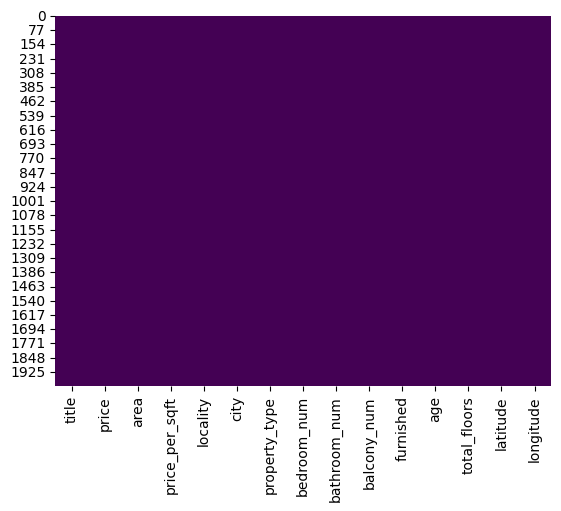

In [10]:
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.show

### Outliers Decections

<Axes: >

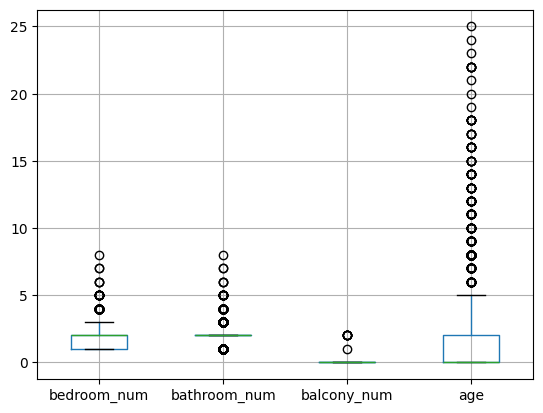

In [11]:
df[['bedroom_num','bathroom_num','balcony_num','age']].boxplot()

Axes(0.125,0.11;0.775x0.77)


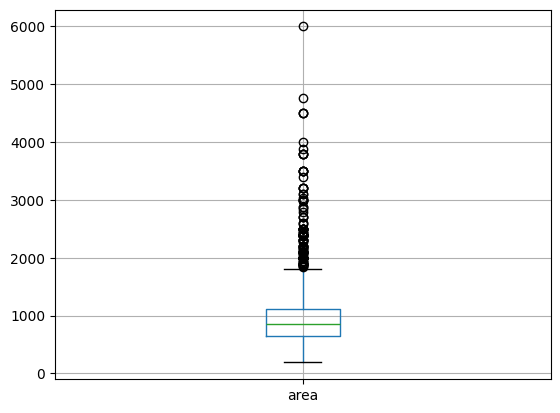

In [12]:
print(df[['area']].boxplot())

(<Axes: >,)

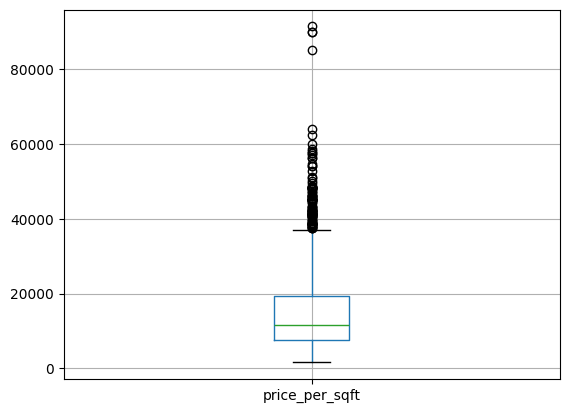

In [13]:
df[['price_per_sqft']].boxplot(),

<Axes: >

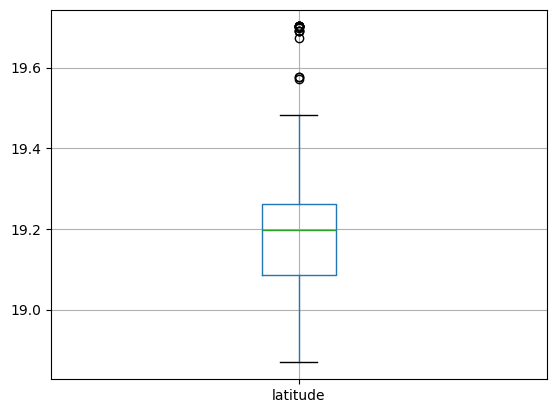

In [14]:
df[['latitude']].boxplot()

<Axes: >

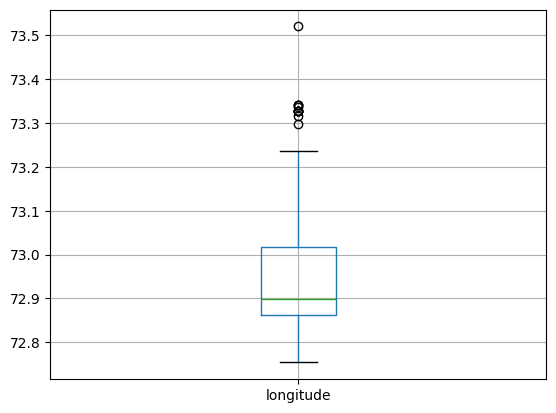

In [15]:
df[['longitude']].boxplot()

<Axes: >

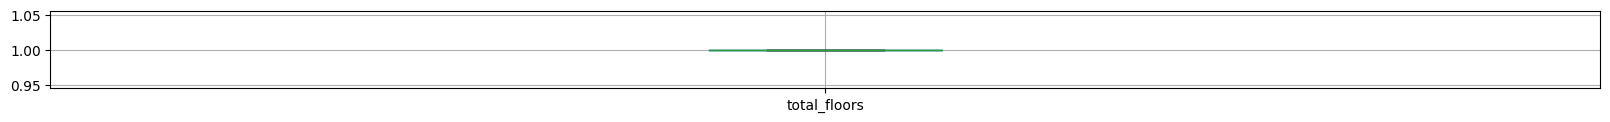

In [16]:
df[['total_floors']].boxplot(figsize=(20,1)) # no  outliers

from scipy.stats import boxcox

here i tried but not find any solution on outlier detection using mean, boxcox

### 3.EDA and Feature Engineering 

In [17]:
df=df.drop(columns=['balcony_num','title','city','property_type'], axis=1)
df

,price,area,price_per_sqft,locality,bedroom_num,bathroom_num,furnished,age,total_floors,latitude,longitude
0,6600283,757,8719.000000,Kalyan,2,2,Unfurnished,0,1,19.244410,73.123253
1,6169841,652,9462.946319,Kalyan,2,2,Unfurnished,0,1,19.257294,73.148872
2,4599936,396,11616.000000,Dombivali,1,1,Unfurnished,0,1,19.209026,73.081276
3,51980000,1130,46000.000000,Ville Parle,3,3,Unfurnished,0,1,19.097841,72.851158
4,3915000,435,9000.000000,Nala Sopara,1,1,Unfurnished,0,1,19.420601,72.809319
...,...,...,...,...,...,...,...,...,...,...,...
1994,74000000,1600,46250.000000,Vile Parle,4,4,Unfurnished,6,1,19.107908,72.836632
1995,9000000,600,15000.000000,Chembur,1,1,Furnished,0,1,19.048351,72.887627
1996,2980000,750,3973.333333,Badlapur,1,2,Unfurnished,0,1,19.177496,73.232552
1997,12200000,950,12842.105260,Thane,2,2,SemiFurnished,6,1,19.231535,72.978653


In [18]:
df.shape

(1999, 11)

In [19]:
df.columns

Index(['price', 'area', 'price_per_sqft', 'locality', 'bedroom_num',
       'bathroom_num', 'furnished', 'age', 'total_floors', 'latitude',
       'longitude'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           1999 non-null   int64  
 1   area            1999 non-null   int64  
 2   price_per_sqft  1999 non-null   float64
 3   locality        1999 non-null   object 
 4   bedroom_num     1999 non-null   int64  
 5   bathroom_num    1999 non-null   int64  
 6   furnished       1999 non-null   object 
 7   age             1999 non-null   int64  
 8   total_floors    1999 non-null   int64  
 9   latitude        1999 non-null   float64
 10  longitude       1999 non-null   float64
dtypes: float64(3), int64(6), object(2)
memory usage: 171.9+ KB


#### 3.1 locality

In [21]:
df['locality'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1999 entries, 0 to 1998
Series name: locality
Non-Null Count  Dtype 
--------------  ----- 
1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


In [22]:
df['locality'].value_counts().to_dict()

{'Mira Road': 193,
 'Thane': 148,
 'Kharghar': 106,
 'Kandivali': 89,
 'Kalyan': 83,
 'Borivali': 74,
 'Vasai': 72,
 'Andheri': 67,
 'Chembur': 63,
 'Bhayandar': 58,
 'Koper Khairane': 53,
 'Dombivali': 53,
 'Mulund': 52,
 'Virar': 48,
 'Goregaon': 39,
 'Malad': 37,
 'Panvel': 37,
 'Naigaon': 36,
 'Taloja': 30,
 'Dombivli': 29,
 'Vashi': 28,
 'Ambernath': 28,
 'Ulwe': 28,
 'Ghansoli': 25,
 'Powai': 24,
 'Bhiwandi': 24,
 'Jogeshwari': 23,
 'Dahisar': 20,
 'Bhandup': 19,
 'Vikhroli': 19,
 'Kalamboli': 18,
 'Juhu': 18,
 'Kurla': 17,
 'Nala Sopara': 17,
 'Wadala': 16,
 'Taloje': 15,
 'Nalasopara': 15,
 'Ghatkopar': 15,
 'Kamothe': 14,
 'Kalwa': 14,
 'Sion': 13,
 'Kasaradavali Thane': 12,
 'Airoli': 11,
 'Lower Parel': 11,
 'Santacruz': 11,
 'Dadar': 10,
 'Byculla': 10,
 'Karjat': 10,
 'Sanpada': 9,
 'Thakurli': 9,
 'Bandra': 9,
 'Palghar': 9,
 'Ville Parle': 8,
 'Badlapur': 7,
 'Nerul': 7,
 'Prabhadevi': 7,
 'Mumbra': 6,
 'Mahim': 6,
 'Deonar': 5,
 'Kanjurmarg': 5,
 'Parel': 4,
 'Vile Parl

In [23]:
df=pd.get_dummies(df, columns=['locality'], dtype=int)
df

,price,area,price_per_sqft,bedroom_num,bathroom_num,furnished,age,total_floors,latitude,longitude,...,locality_Vasai,locality_Vashi,locality_Vevoor,locality_Vikhroli,locality_Vikroli,locality_Vile Parle,locality_Ville Parle,locality_Virar,locality_Wadala,locality_Worli
0,6600283,757,8719.000000,2,2,Unfurnished,0,1,19.244410,73.123253,...,0,0,0,0,0,0,0,0,0,0
1,6169841,652,9462.946319,2,2,Unfurnished,0,1,19.257294,73.148872,...,0,0,0,0,0,0,0,0,0,0
2,4599936,396,11616.000000,1,1,Unfurnished,0,1,19.209026,73.081276,...,0,0,0,0,0,0,0,0,0,0
3,51980000,1130,46000.000000,3,3,Unfurnished,0,1,19.097841,72.851158,...,0,0,0,0,0,0,1,0,0,0
4,3915000,435,9000.000000,1,1,Unfurnished,0,1,19.420601,72.809319,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,74000000,1600,46250.000000,4,4,Unfurnished,6,1,19.107908,72.836632,...,0,0,0,0,0,1,0,0,0,0
1995,9000000,600,15000.000000,1,1,Furnished,0,1,19.048351,72.887627,...,0,0,0,0,0,0,0,0,0,0
1996,2980000,750,3973.333333,1,2,Unfurnished,0,1,19.177496,73.232552,...,0,0,0,0,0,0,0,0,0,0
1997,12200000,950,12842.105260,2,2,SemiFurnished,6,1,19.231535,72.978653,...,0,0,0,0,0,0,0,0,0,0


#### 3.2 furnished

In [24]:
df['furnished'].value_counts()

furnished
Unfurnished      1245
SemiFurnished     627
Furnished         127
Name: count, dtype: int64

In [25]:
df=pd.get_dummies(df, columns=['furnished'], dtype=int)
df

,price,area,price_per_sqft,bedroom_num,bathroom_num,age,total_floors,latitude,longitude,locality_Airoli,...,locality_Vikhroli,locality_Vikroli,locality_Vile Parle,locality_Ville Parle,locality_Virar,locality_Wadala,locality_Worli,furnished_Furnished,furnished_SemiFurnished,furnished_Unfurnished
0,6600283,757,8719.000000,2,2,0,1,19.244410,73.123253,0,...,0,0,0,0,0,0,0,0,0,1
1,6169841,652,9462.946319,2,2,0,1,19.257294,73.148872,0,...,0,0,0,0,0,0,0,0,0,1
2,4599936,396,11616.000000,1,1,0,1,19.209026,73.081276,0,...,0,0,0,0,0,0,0,0,0,1
3,51980000,1130,46000.000000,3,3,0,1,19.097841,72.851158,0,...,0,0,0,1,0,0,0,0,0,1
4,3915000,435,9000.000000,1,1,0,1,19.420601,72.809319,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,74000000,1600,46250.000000,4,4,6,1,19.107908,72.836632,0,...,0,0,1,0,0,0,0,0,0,1
1995,9000000,600,15000.000000,1,1,0,1,19.048351,72.887627,0,...,0,0,0,0,0,0,0,1,0,0
1996,2980000,750,3973.333333,1,2,0,1,19.177496,73.232552,0,...,0,0,0,0,0,0,0,0,0,1
1997,12200000,950,12842.105260,2,2,6,1,19.231535,72.978653,0,...,0,0,0,0,0,0,0,0,1,0


In [26]:
df.info()  # After 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Columns: 107 entries, price to furnished_Unfurnished
dtypes: float64(3), int64(104)
memory usage: 1.6 MB


## Feature Scalling

In [28]:
x=df.drop('price', axis=1)
y=df['price']


In [29]:
normal_scaler=MinMaxScaler()
array=normal_scaler.fit_transform(x)
x=pd.DataFrame(array, columns=x.columns)
x

,area,price_per_sqft,bedroom_num,bathroom_num,age,total_floors,latitude,longitude,locality_Airoli,locality_Ambernath,...,locality_Vikhroli,locality_Vikroli,locality_Vile Parle,locality_Ville Parle,locality_Virar,locality_Wadala,locality_Worli,furnished_Furnished,furnished_SemiFurnished,furnished_Unfurnished
0,0.097590,0.079167,0.142857,0.142857,0.00,0.0,0.450926,0.481812,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.079518,0.087450,0.142857,0.142857,0.00,0.0,0.466392,0.515241,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.035456,0.111421,0.000000,0.000000,0.00,0.0,0.408453,0.427040,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.161790,0.494229,0.285714,0.285714,0.00,0.0,0.274990,0.126777,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.042169,0.082296,0.000000,0.000000,0.00,0.0,0.662421,0.072184,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.242685,0.497012,0.428571,0.428571,0.24,0.0,0.287074,0.107823,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1995,0.070568,0.149096,0.000000,0.000000,0.00,0.0,0.215584,0.174362,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1996,0.096386,0.026332,0.000000,0.142857,0.00,0.0,0.370605,0.624428,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1997,0.130809,0.125071,0.142857,0.142857,0.24,0.0,0.435472,0.293135,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Train Test Split

In [30]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=30)
x_train

,area,price_per_sqft,bedroom_num,bathroom_num,age,total_floors,latitude,longitude,locality_Airoli,locality_Ambernath,...,locality_Vikhroli,locality_Vikroli,locality_Vile Parle,locality_Ville Parle,locality_Virar,locality_Wadala,locality_Worli,furnished_Furnished,furnished_SemiFurnished,furnished_Unfurnished
886,0.093804,0.083409,0.000000,0.142857,0.0,0.0,0.523463,0.136622,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
259,0.084337,0.102434,0.000000,0.142857,0.0,0.0,0.409007,0.335255,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
659,0.655766,0.121262,0.571429,0.571429,0.0,0.0,0.421611,0.291074,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1952,0.156627,0.033714,0.142857,0.142857,0.0,0.0,0.580754,0.161132,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
212,0.122203,0.142911,0.142857,0.142857,0.0,0.0,0.415027,0.290686,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.158348,0.060330,0.142857,0.142857,0.0,0.0,0.593216,0.075369,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1837,0.115318,0.241010,0.142857,0.142857,0.0,0.0,0.398547,0.158523,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
941,0.086919,0.019020,0.000000,0.142857,0.0,0.0,0.384894,0.552851,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
421,0.071429,0.042823,0.000000,0.142857,0.0,0.0,0.243042,0.447876,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Train Model

In [31]:
knn_reg_model=KNeighborsRegressor(n_neighbors=5, p=2)
knn_reg_model.fit(x_train, y_train)

KNeighborsRegressor()

### Model Evaluation

In [32]:
#Training Data

y_pred_train=knn_reg_model.predict(x_train)

mse=mean_squared_error(y_train, y_pred_train)
print("MSE:",mse)

rmse=np.sqrt(mse)
print('RMSE:', rmse)
mae=mean_absolute_error(y_train, y_pred_train)
print('MAE:', mae)
r_squared=r2_score(y_train, y_pred_train)
print("R-Squared:", r_squared)


MSE: 103877789496276.81
RMSE: 10192045.402973674
MAE: 3510757.626516573
R-Squared: 0.7859389473422598


  File "C:\Users\DELL E7480\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\DELL E7480\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\DELL E7480\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\DELL E7480\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [33]:
#Testing Data Evaluation

y_pred_test=knn_reg_model.predict(x_test)

mse=mean_squared_error(y_test, y_pred_test)
print("MSE:",mse)

rmse=np.sqrt(mse)
print('RMSE:', rmse)

mae=mean_absolute_error(y_test, y_pred_test)
print('MAE:', mae)



r_squared=r2_score(y_test, y_pred_test)
print("R-Squared:", r_squared)


MSE: 87419228342383.4
RMSE: 9349825.043410353
MAE: 3698421.1854999997
R-Squared: 0.8101377358112934


### 1. Manhattan Distance

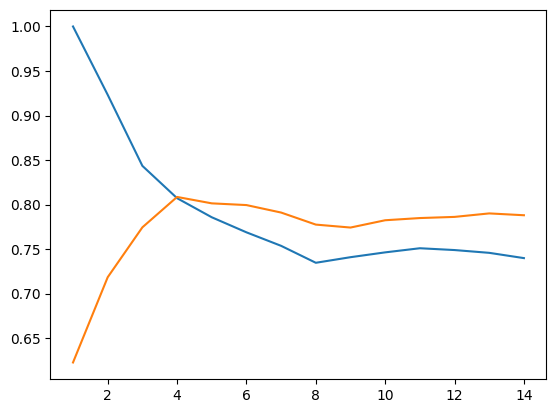

In [34]:
k_values=range(1, 15)
training_accuracy_list=[]
testing_accuracy_list=[]
for k in k_values:
    knn_model=KNeighborsRegressor(n_neighbors=k, p=1)
    knn_model.fit(x_train, y_train)
    training_accuracy_list.append(knn_model.score(x_train, y_train))
    testing_accuracy_list.append(knn_model.score(x_test, y_test))

plt. plot(k_values, training_accuracy_list)
plt.plot(k_values, testing_accuracy_list)

In [35]:
knn_reg_model=KNeighborsRegressor(n_neighbors=4, p=1 )
knn_reg_model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=4, p=1)

In [36]:
#Training Data

y_pred_train=knn_reg_model.predict(x_train)

mse=mean_squared_error(y_train, y_pred_train)
print("MSE:",mse)

rmse=np.sqrt(mse)
print('RMSE:', rmse)

mae=mean_absolute_error(y_train, y_pred_train)
print('MAE:', mae)

r_squared=r2_score(y_train, y_pred_train)
print("R-Squared:", r_squared)


MSE: 93576656881517.9
RMSE: 9673502.82377164
MAE: 3226123.155253283
R-Squared: 0.8071665004291619


In [37]:
#Testing Data Evaluation

y_pred_test=knn_reg_model.predict(x_test)

mse=mean_squared_error(y_test, y_pred_test)
print("MSE:",mse)

rmse=np.sqrt(mse)
print('RMSE:', rmse)

mae=mean_absolute_error(y_test, y_pred_test)
print('MAE:', mae)



r_squared=r2_score(y_test, y_pred_test)
print("R-Squared:", r_squared)


MSE: 88154616098493.94
RMSE: 9389068.96867277
MAE: 3678248.58125
R-Squared: 0.8085405770731157


### 2.Eucliden Distance

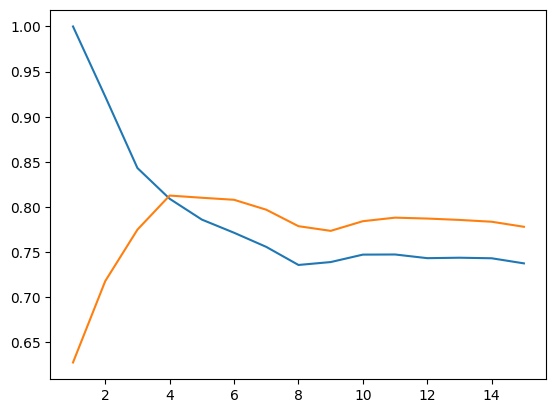

In [38]:
k_values=range(1, 16)
training_accuracy_list=[]
testing_accuracy_list=[]
for k in k_values:
    knn_model=KNeighborsRegressor(n_neighbors=k, p=2)
    knn_model.fit(x_train, y_train)
    training_accuracy_list.append(knn_model.score(x_train, y_train))
    testing_accuracy_list.append(knn_model.score(x_test, y_test))

plt. plot(k_values, training_accuracy_list)
plt.plot(k_values, testing_accuracy_list)

In [39]:
knn_reg_model=KNeighborsRegressor(n_neighbors=4, p=1 )
knn_reg_model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=4, p=1)

In [40]:
#Training Data

y_pred_train=knn_reg_model.predict(x_train)

mse=mean_squared_error(y_train, y_pred_train)
print("MSE:",mse)

rmse=np.sqrt(mse)
print('RMSE:', rmse)

mae=mean_absolute_error(y_train, y_pred_train)
print('MAE:', mae)

r_squared=r2_score(y_train, y_pred_train)
print("R-Squared:", r_squared)


MSE: 93576656881517.9
RMSE: 9673502.82377164
MAE: 3226123.155253283
R-Squared: 0.8071665004291619


In [41]:
#Testing Data Evaluation

y_pred_test=knn_reg_model.predict(x_test)

mse=mean_squared_error(y_test, y_pred_test)
print("MSE:",mse)

rmse=np.sqrt(mse)
print('RMSE:', rmse)

mae=mean_absolute_error(y_test, y_pred_test)
print('MAE:', mae)



r_squared=r2_score(y_test, y_pred_test)
print("R-Squared:", r_squared)

MSE: 88154616098493.94
RMSE: 9389068.96867277
MAE: 3678248.58125
R-Squared: 0.8085405770731157


In [42]:
df.corr()

,price,area,price_per_sqft,bedroom_num,bathroom_num,age,total_floors,latitude,longitude,locality_Airoli,...,locality_Vikhroli,locality_Vikroli,locality_Vile Parle,locality_Ville Parle,locality_Virar,locality_Wadala,locality_Worli,furnished_Furnished,furnished_SemiFurnished,furnished_Unfurnished
price,1.000000,0.700207,0.782109,0.653949,0.654194,0.019566,NaN,-0.291556,-0.235416,-0.005200,...,-0.025976,-0.008532,0.183124,0.063699,-0.088245,0.056284,0.059501,0.094782,0.037871,-0.083952
area,0.700207,1.000000,0.288322,0.831789,0.767993,0.061289,NaN,-0.192133,0.027114,0.014578,...,-0.062090,-0.020672,0.099277,-0.011055,-0.057688,-0.016643,0.014469,0.073086,0.089548,-0.122504
price_per_sqft,0.782109,0.288322,1.000000,0.436842,0.423876,-0.038232,NaN,-0.400976,-0.403806,-0.008205,...,0.014420,0.003451,0.145512,0.164780,-0.145440,0.124983,0.103560,0.116022,-0.009599,-0.049199
bedroom_num,0.653949,0.831789,0.436842,1.000000,0.821114,0.023939,NaN,-0.199120,-0.061464,-0.003973,...,-0.048741,-0.021667,0.106875,0.044952,-0.082469,0.038585,0.020266,0.073462,0.082071,-0.115535
bathroom_num,0.654194,0.767993,0.423876,0.821114,1.000000,-0.025269,NaN,-0.134244,-0.137481,-0.005604,...,-0.046864,-0.001686,0.139508,0.045791,-0.041014,0.014729,-0.002921,0.048436,0.094939,-0.115259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
locality_Wadala,0.056284,-0.016643,0.124983,0.038585,0.014729,-0.016938,NaN,-0.121396,-0.069745,-0.006682,...,-0.008799,-0.002010,-0.004022,-0.005694,-0.014089,1.000000,-0.003482,-0.023396,0.048176,-0.034343
locality_Worli,0.059501,0.014469,0.103560,0.020266,-0.002921,-0.019926,NaN,-0.058703,-0.044985,-0.002884,...,-0.003798,-0.000867,-0.001736,-0.002457,-0.006081,-0.003482,1.000000,-0.010098,0.001644,0.003508
furnished_Furnished,0.094782,0.073086,0.116022,0.073462,0.048436,0.143253,NaN,-0.067807,-0.014519,-0.019375,...,-0.025515,-0.005827,-0.011663,0.015974,-0.040855,-0.023396,-0.010098,1.000000,-0.176078,-0.334694
furnished_SemiFurnished,0.037871,0.089548,-0.009599,0.082071,0.094939,-0.003955,NaN,0.210301,-0.182753,-0.035711,...,0.044898,-0.015124,-0.006143,-0.025774,0.055952,0.048176,0.001644,-0.176078,1.000000,-0.868672


In [43]:
df.cov()

,price,area,price_per_sqft,bedroom_num,bathroom_num,age,total_floors,latitude,longitude,locality_Airoli,...,locality_Vikhroli,locality_Vikroli,locality_Vile Parle,locality_Ville Parle,locality_Virar,locality_Wadala,locality_Worli,furnished_Furnished,furnished_SemiFurnished,furnished_Unfurnished
price,4.806758e+14,8.286022e+09,1.834273e+11,1.282242e+07,1.123993e+07,1.730613e+06,0.0,-798754.324528,-580370.474042,-8436.287116,...,-55271.559355,-4.183989e+03,179460.241759,88193.566600,-296252.824624,109983.111679,50511.097235,506993.634291,385336.476228,-892330.110519
area,8.286022e+09,2.913310e+05,1.664720e+06,4.015195e+02,3.248490e+02,1.334596e+02,0.0,-12.958673,1.645599,0.582239,...,-3.252527,-2.495535e-01,2.395180,-0.376808,-4.767855,-0.800663,0.302391,9.624529,22.431385,-32.055914
price_per_sqft,1.834273e+11,1.664720e+06,1.144303e+08,4.179223e+03,3.553366e+03,-1.649963e+03,0.0,-535.987232,-485.721845,-6.494167,...,14.970319,8.256748e-01,69.577307,111.314322,-238.232392,119.162077,42.894426,302.803152,-47.654949,-255.148203
bedroom_num,1.282242e+07,4.015195e+02,4.179223e+03,7.998349e-01,5.754854e-01,8.637327e-02,0.0,-0.022253,-0.006181,-0.000263,...,-0.004231,-4.333999e-04,0.004272,0.002539,-0.011294,0.003076,0.000702,0.016029,0.034064,-0.050093
bathroom_num,1.123993e+07,3.248490e+02,3.553366e+03,5.754854e-01,6.141314e-01,-7.988904e-02,0.0,-0.013146,-0.012115,-0.000325,...,-0.003564,-2.954430e-05,0.004887,0.002266,-0.004922,0.001029,-0.000089,0.009261,0.034529,-0.043790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
locality_Wadala,1.099831e+05,-8.006631e-01,1.191621e+02,3.075612e-03,1.028793e-03,-6.090383e-03,0.0,-0.001352,-0.000699,-0.000044,...,-0.000076,-4.006007e-06,-0.000016,-0.000032,-0.000192,0.007944,-0.000012,-0.000509,0.001993,-0.001484
locality_Worli,5.051110e+04,3.023907e-01,4.289443e+01,7.018024e-04,-8.863291e-05,-3.112667e-03,0.0,-0.000284,-0.000196,-0.000008,...,-0.000014,-7.511263e-07,-0.000003,-0.000006,-0.000036,-0.000012,0.001499,-0.000095,0.000030,0.000066
furnished_Furnished,5.069936e+05,9.624529e+00,3.028032e+02,1.602929e-02,9.260887e-03,1.410032e-01,0.0,-0.002067,-0.000398,-0.000350,...,-0.000604,-3.179768e-05,-0.000127,0.000246,-0.001526,-0.000509,-0.000095,0.059525,-0.019937,-0.039588
furnished_SemiFurnished,3.853365e+05,2.243138e+01,-4.765495e+01,3.406408e-02,3.452878e-02,-7.404353e-03,0.0,0.012196,-0.009537,-0.001226,...,0.002022,-1.569854e-04,-0.000127,-0.000755,0.003976,0.001993,0.000030,-0.019937,0.215384,-0.195447


### Save final Model 

In [44]:
knn_model=KNeighborsRegressor(n_neighbors=5, p=1)
knn_model.fit(x_train, y_train)

KNeighborsRegressor(p=1)

In [45]:
df.iloc[55:56]

,price,area,price_per_sqft,bedroom_num,bathroom_num,age,total_floors,latitude,longitude,locality_Airoli,...,locality_Vikhroli,locality_Vikroli,locality_Vile Parle,locality_Ville Parle,locality_Virar,locality_Wadala,locality_Worli,furnished_Furnished,furnished_SemiFurnished,furnished_Unfurnished
55,100000000,1600,62500.0,4,4,6,1,19.114063,72.831352,0,...,0,0,1,0,0,0,0,0,0,1
